# Project 9: Analyzing Plastic Waste Management

## Your name: Audrey Marthin

### Your sources: 
- https://pandas.pydata.org/docs/ 
- https://stacksoverflow.com 
- https://seaborn.pydata.org/examples/index.html
- geeksforgeeks
- Professor Wirfs-Brock's Class Code Demo

Due date: Wednesday December 13 at 11:59 pm


In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Choosing a topic and finding data

#### Data Sources: 
- https://ourworldindata.org/plastic-pollution = I took several data from ourworldindata, specifically all of the data except for GDP data
- https://databank.worldbank.org/reports.aspx?source=2&series=SP.POP.TOTL&country= = I took the GDP data from worldbank

In [463]:
# import csv as dataframe

plastic_in_river = pd.read_csv("data/plastic-waste-accumulated-rivers-lakes.csv")
plastic_in_ocean = pd.read_csv("data/plastic-waste-accumulated-in-oceans.csv")
global_fate_share = pd.read_csv("data/share-plastic-fate.csv")

plastic_emitted_ocean = pd.read_csv("data/plastic-waste-emitted-to-the-ocean.csv")
global_mismanaged_share = pd.read_csv("data/share-of-global-mismanaged-plastic-waste.csv")
global_emitted_share = pd.read_csv("data/share-of-global-plastic-waste-emitted-to-the-ocean.csv")
global_gdp = pd.read_csv("data/global_information.csv")

In [464]:
# examine datasets

global_fate_share

,Entity,Code,Year,14.1.1 - Beach litter per square kilometer (Number) - EN_MAR_BEALITSQ
0,Africa (UN),NaN,2015,3823505.800
1,Africa (UN),NaN,2016,5685998.000
2,Africa (UN),NaN,2017,2529506.800
3,Africa (UN),NaN,2018,29924936.000
4,Africa (UN),NaN,2019,4628005.000
...,...,...,...,...
472,World,OWID_WRL,2016,15450519.000
473,World,OWID_WRL,2017,17937112.000
474,World,OWID_WRL,2018,35052868.000
475,World,OWID_WRL,2019,10877298.000


## Part 2: Conduct your Analysis & Visualization

### Data Wrangling

In [465]:
# data wrangling on related dataset
# do this by merging the related datasets into one dataframe
# first merge is done based on sub-region and year column

df_plastic_management = pd.merge(plastic_in_river, 
                               plastic_in_ocean[["Entity", "Year", 
                                                 "Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in oceans"]], 
                               on=["Entity", "Year"], how="left")
df_plastic_management

,Entity,Code,Year,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in rivers and lakes,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in oceans
0,Americas (excl. USA),NaN,2000,3986388.000,1104799.000
1,Americas (excl. USA),NaN,2001,4271941.000,1198096.000
2,Americas (excl. USA),NaN,2002,4576004.000,1298042.000
3,Americas (excl. USA),NaN,2003,4896081.000,1404860.000
4,Americas (excl. USA),NaN,2004,5235736.000,1519021.000
...,...,...,...,...,...
195,World,OWID_WRL,2015,91952040.000,24102792.000
196,World,OWID_WRL,2016,96270140.000,25592508.000
197,World,OWID_WRL,2017,100631390.000,27140496.000
198,World,OWID_WRL,2018,105002030.000,28747704.000


In [466]:
# second merge of updated dataset to another related dataset done based on sub-region and year column

df_plastic_management = pd.merge(df_plastic_management, 
                               global_fate_share[["Entity", "Year", 
                                                  "Share of waste recycled from total regional waste", 
                                                  "Share of waste incinerated from total regional waste", 
                                                  "Share of littered and mismanaged from total regional waste", 
                                                  "Share of waste landfilled from total regional waste"]], 
                               on=["Entity", "Year"], how="left")
df_plastic_management

,Entity,Code,Year,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in rivers and lakes,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in oceans,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste
0,Americas (excl. USA),NaN,2000,3986388.000,1104799.000,4.722,1.220,32.703,61.355
1,Americas (excl. USA),NaN,2001,4271941.000,1198096.000,4.973,1.209,32.651,61.168
2,Americas (excl. USA),NaN,2002,4576004.000,1298042.000,5.227,1.198,32.611,60.964
3,Americas (excl. USA),NaN,2003,4896081.000,1404860.000,5.483,1.186,32.546,60.785
4,Americas (excl. USA),NaN,2004,5235736.000,1519021.000,5.740,1.175,32.481,60.604
...,...,...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,91952040.000,24102792.000,8.165,17.625,24.083,50.127
196,World,OWID_WRL,2016,96270140.000,25592508.000,8.450,18.085,23.627,49.838
197,World,OWID_WRL,2017,100631390.000,27140496.000,8.747,18.578,23.200,49.475
198,World,OWID_WRL,2018,105002030.000,28747704.000,9.037,19.084,22.698,49.181


### I. Which sub-region has the worst plastic leakage to aquatic environment?

In [467]:
# combine the plastic leakage data to the ocean and to the rivers/lakes
df_plastic_management["Per year plastic leakage to aquatic environment"] = (df_plastic_management["Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in rivers and lakes"] +
                                                                         df_plastic_management["Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in oceans"])
df_plastic_management

,Entity,Code,Year,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in rivers and lakes,Plastic leakage to aquatic envrionment - Leakage_type: Accumulated stock in oceans,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste,Per year plastic leakage to aquatic environment
0,Americas (excl. USA),NaN,2000,3986388.000,1104799.000,4.722,1.220,32.703,61.355,5091187.000
1,Americas (excl. USA),NaN,2001,4271941.000,1198096.000,4.973,1.209,32.651,61.168,5470037.000
2,Americas (excl. USA),NaN,2002,4576004.000,1298042.000,5.227,1.198,32.611,60.964,5874046.000
3,Americas (excl. USA),NaN,2003,4896081.000,1404860.000,5.483,1.186,32.546,60.785,6300941.000
4,Americas (excl. USA),NaN,2004,5235736.000,1519021.000,5.740,1.175,32.481,60.604,6754757.000
...,...,...,...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,91952040.000,24102792.000,8.165,17.625,24.083,50.127,116054832.000
196,World,OWID_WRL,2016,96270140.000,25592508.000,8.450,18.085,23.627,49.838,121862648.000
197,World,OWID_WRL,2017,100631390.000,27140496.000,8.747,18.578,23.200,49.475,127771886.000
198,World,OWID_WRL,2018,105002030.000,28747704.000,9.037,19.084,22.698,49.181,133749734.000


In [468]:
# display values in normal format (non-scientific notation) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# create a dataframe with pivot_table, summarizing the annual plastic leakage to aquatic environments
# for different sub-region and years, aggregating the values based on the specified index columns entity and year.
leakage_by_region = pd.pivot_table(df_plastic_management, values="Per year plastic leakage to aquatic environment", index=["Entity", "Year"])

# examine
leakage_by_region

Per year plastic leakage to aquatic environment
Entity               Year                                                 
Americas (excl. USA) 2000                                      5091187.000
                     2001                                      5470037.000
                     2002                                      5874046.000
                     2003                                      6300941.000
                     2004                                      6754757.000
...                                                                    ...
World                2015                                    116054832.000
                     2016                                    121862648.000
                     2017                                    127771886.000
                     2018                                    133749734.000
                     2019                                    139845748.000

[200 rows x 1 columns]

#### a.) Overall worst year

In [469]:
# find maximum plastic leakage then see when and where this happens for total world data
leakage_world = leakage_by_region[leakage_by_region.index.get_level_values("Entity") == "World"]
max_leakage_world = leakage_world[leakage_world["Per year plastic leakage to aquatic environment"] == leakage_world["Per year plastic leakage to aquatic environment"].max()]
max_leakage_world

,,Per year plastic leakage to aquatic environment
Entity,Year,
World,2019,139845748.000


The worst overall year of plastic leakage to aquatic environment worldwide happened in 2019 with a value of 139845748.000.

In [470]:
# find maximum plastic leakage then see when and where this happens for sub-regions
leakage_by_region = leakage_by_region[leakage_by_region.index.get_level_values("Entity") != "World"]
max_leakage_region = leakage_by_region[leakage_by_region["Per year plastic leakage to aquatic environment"] == leakage_by_region["Per year plastic leakage to aquatic environment"].max()]
max_leakage_region

,,Per year plastic leakage to aquatic environment
Entity,Year,
China,2019,30360085.000


The worst plastic leakage from sub-regions to aquatic environment happened in 2019 with a value of 30360085.000 by China. Unsurprisingly, this happens in 2019 which is the year with the worst plastic leakage.

In [471]:
worst_region_proportion = max_leakage_region["Per year plastic leakage to aquatic environment"].max()/max_leakage_world["Per year plastic leakage to aquatic environment"].max() * 100
worst_region_proportion

21.709694741666368

This shows China contributes to 21.7% of the plastic leakage to aquatic environment in the year 2019.

#### b.) Average worst plastic leakage 

In [472]:
# group by country and calculate the mean for each group
ave_leakage = leakage_by_region.groupby("Entity")["Per year plastic leakage to aquatic environment"].mean().reset_index().sort_values("Per year plastic leakage to aquatic environment", ascending=False)
ave_leakage

,Entity,Per year plastic leakage to aquatic environment
2,China,17969497.450
3,Europe,16634824.650
1,Asia (excl. China and India),16149603.750
8,United States,11379054.300
0,Americas (excl. USA),10007922.500
7,Sub-Saharan Africa,7353745.113
5,Middle East & North Africa,5574149.053
4,India,3793765.248
6,Oceania,163673.999


#### c.) Largest percent increase 

In [473]:
# calculate the total plastic leakage for each sub-region
leakage_by_region["Total plastic leakage to aquatic environment"] = leakage_by_region.groupby("Entity")["Per year plastic leakage to aquatic environment"].transform('sum')

# calculate the percent change
leakage_by_region["Percent Change"] = leakage_by_region.groupby("Entity")["Per year plastic leakage to aquatic environment"].pct_change() * 100

# examine
leakage_by_region.describe()

/var/folders/bh/xqyxqp8s2q38cmtnzdzxyyl00000gn/T/ipykernel_37363/4251237258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leakage_by_region["Total plastic leakage to aquatic environment"] = leakage_by_region.groupby("Entity")["Per year plastic leakage to aquatic environment"].transform('sum')
/var/folders/bh/xqyxqp8s2q38cmtnzdzxyyl00000gn/T/ipykernel_37363/4251237258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leakage_by_region["Percent Change"] = leakage_by_region.groupby("Entity")["Per year 

,Per year plastic leakage to aquatic environment,Total plastic leakage to aquatic environment,Percent Change
count,180.000,180.000,171.000
mean,9891804.007,197836080.141,6.612
std,7009268.873,117517979.743,2.536
min,68926.000,3273479.980,1.744
25%,4583750.500,111482981.060,5.063
50%,8936883.000,200158450.000,6.671
75%,13855902.250,322992075.000,8.206
max,30360085.000,359389949.000,13.617


We can see that the minimum percent change is 1.744% which shows that all of the sub-regions always have a percent increase of plastic leakage to aquatic environment every year from the year 2000-2019 with no sub-region having percent decrease in any year.

In [474]:
# find mean percent change throughout the period 2000-2019 
leakage_by_pct_change = leakage_by_region.groupby("Entity")["Percent Change"].mean().reset_index().sort_values("Percent Change", ascending=False)
leakage_by_pct_change

,Entity,Percent Change
4,India,10.267
7,Sub-Saharan Africa,8.151
6,Oceania,7.849
2,China,7.760
1,Asia (excl. China and India),7.229
0,Americas (excl. USA),6.250
5,Middle East & North Africa,5.922
3,Europe,3.165
8,United States,2.915


We can see that the largest average percent change per region is at 10.367% by India followed by 8.151% by Sub-Saharan Africa.

#### Overall, we can see from a couple of metrics which sub-region has the worst plastic leakage to aquatic environments: 

- The largest total plastic leakage worldwide happened in 2019, which is unsurprising considering that this is the most recent year of this dataset. Out of all the sub-regions, China contributed 21.7% which is the largest plastic leakage. 
- Looking at the average plastic leakage per year of all the sub-regions, we can see that China again is at first place with 17969497.450 average leakage/year. Europe and Asia follows after with respectively 16634824.650 and 16149603.750 average plastic leakage/year.
- If we look at average percent increase per year throughout the period 2000-2019, we can see that India has the highest percent increase of plastic leakage with an average 10.267% increase per year. Sub-Saharan Afrika and Oceania follows after with respectively 8.151% and 7.849%. 

### II. Are there any correlations between trends of plastic waste management?

In [475]:
# focus on sub-regions only instead of world
df_region_only = df_plastic_management[df_plastic_management["Entity"] != "World"]

# select relevant columns for correlation analysis
columns = ["Share of waste recycled from total regional waste", 
           "Share of waste incinerated from total regional waste", 
           "Share of littered and mismanaged from total regional waste", 
           "Share of waste landfilled from total regional waste", 
           "Per year plastic leakage to aquatic environment"]

# find correlation
correlation_matrix = df_plastic_management[columns].corr()
correlation_matrix

,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste,Per year plastic leakage to aquatic environment
Share of waste recycled from total regional waste,1.000,0.355,0.004,-0.362,0.211
Share of waste incinerated from total regional waste,0.355,1.000,-0.669,0.210,0.345
Share of littered and mismanaged from total regional waste,0.004,-0.669,1.000,-0.860,-0.171
Share of waste landfilled from total regional waste,-0.362,0.210,-0.860,1.000,-0.015
Per year plastic leakage to aquatic environment,0.211,0.345,-0.171,-0.015,1.000


We can see the correlation matrix above with 1.000 meaning high positive correlation and -1.000 meaning high negative correlation. We can disregard values of 1.000 correlation because that is correlation values of the same metrics.

This result was slightly not what I expected as we can see that share of waste recycled still has a moderate positive correlation with plastic leakage to aquatic environment, which indicates that having a higher share of waste recycled waste doesn't neccessarily mean a lower plastic leakage to aquatic environment. Share of waste recycled also has a moderate positive correlation with share of waste incinerated, indicating that sub-regions who have a higher share of waste recycled might also still engage in waste incineration. However, it also show that share of waste recycled has a moderate negative correlation with share of waste landfilled which means sub-regions with higher share of waste recycled typically don't engage as much with waste landfilling.

Interestingly, share of littered and mismanaged waste has a pretty high negative correlation with share of waste incinerated and share of waste landfilled, but a moderate negative correlation with plastic leakage. This indicates that a higher share of littered and mismanaged waste typically is followed with less share of waste landfilled and share of waste incinerated. We can make sense of this finding since we know if there are more littered and mismanaged waste, that means most of the waste are mismanaged and not undergoing processing like landfilling or incinerating (both which are also bad but still somewhat managed). The low negative correlation with plastic leakage made this finding more interesting as I would have originally expected more mismanaged waste correlate with higher plastic leakage, but that might not be the reality. However, it's still not fully ruled out as the negative correlation is pretty low. Another interesting observation we can see is share of littered and mismanaged waste has almost 0 correlation with share of recycled waste, which means sub-regions with higher recycled waste doesn't neccessarily mean they have less mismanaged waste.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


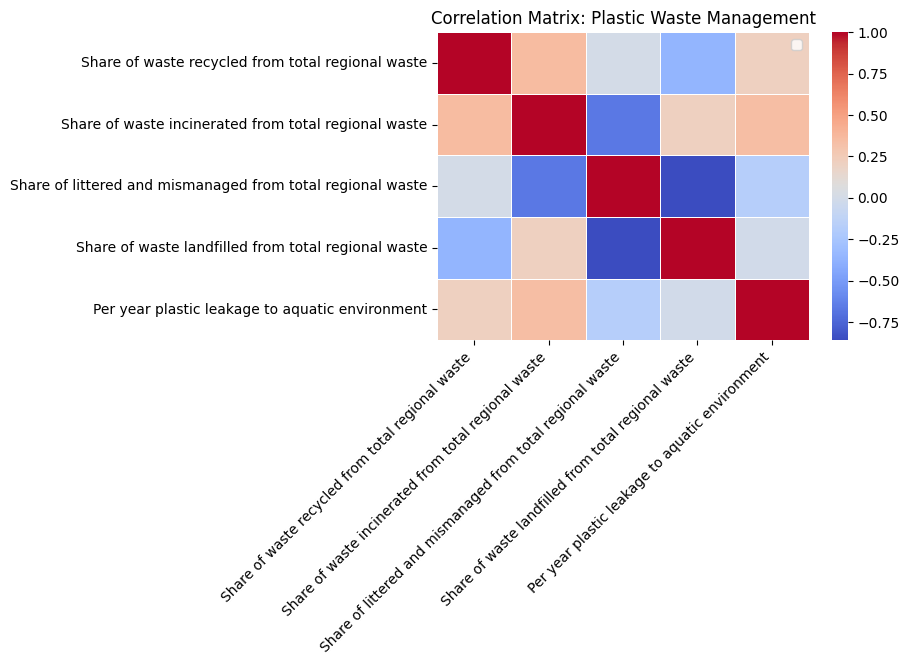

In [476]:
# visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt="0.3f", linewidths=0.5)

# set title
plt.title("Correlation Matrix: Plastic Waste Management")

# adjust layout 
plt.xticks(rotation=45, ha="right")  
plt.legend()
plt.show()

We can see clearer here how the strongest correlation is actually between share of littered and mismanaged waste with share of waste landfilled, which is a negative correlation. The weaker correlation have lighter colors, and we can overall get the information of how correlated some of these metrics are. 

### III. Above and Beyond: How are the average trends for plastic waste management over the period of 2000-2019?
I consider this an above and beyond component as I explored more visualization technique. One that I never experimented before with was the pie chart and I learned a lot of implementing subplots, and more. Besides that, experimenting with a regular scatter plot and making the dots according to the data size was also something new I experimented with here.

In [477]:
# group by country and calculate the mean for each group
df_mean = df_region_only.groupby("Entity")[columns].mean().reset_index()
df_mean

# display values in normal format (non-scientific notation) 
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# sort values according to plastic leakage 
df_mean.sort_values("Per year plastic leakage to aquatic environment", ascending=False)

,Entity,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste,Per year plastic leakage to aquatic environment
2,China,8.846,16.595,43.658,30.901,17969497.450
3,Europe,8.492,26.544,9.292,55.672,16634824.650
1,Asia (excl. China and India),6.129,14.898,35.776,43.197,16149603.750
8,United States,3.405,17.234,5.792,73.569,11379054.300
0,Americas (excl. USA),7.136,1.129,31.476,60.259,10007922.500
7,Sub-Saharan Africa,4.381,0.025,66.585,29.009,7353745.113
5,Middle East & North Africa,4.151,0.434,42.962,52.454,5574149.053
4,India,9.287,2.903,57.242,30.568,3793765.248
6,Oceania,5.323,10.485,9.289,74.902,163673.999


In [478]:
# look at average plastic leakage to aquatic environment
ave_leakage

,Entity,Per year plastic leakage to aquatic environment
2,China,17969497.450
3,Europe,16634824.650
1,Asia (excl. China and India),16149603.750
8,United States,11379054.300
0,Americas (excl. USA),10007922.500
7,Sub-Saharan Africa,7353745.113
5,Middle East & North Africa,5574149.053
4,India,3793765.248
6,Oceania,163673.999


With our previous analysis, we know that China, Europe, and Asia are the sub-regions with highest average plastic leakage to aquatic environment. Let's look at the yearly trend of plastic leakage of each sub-regions.

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

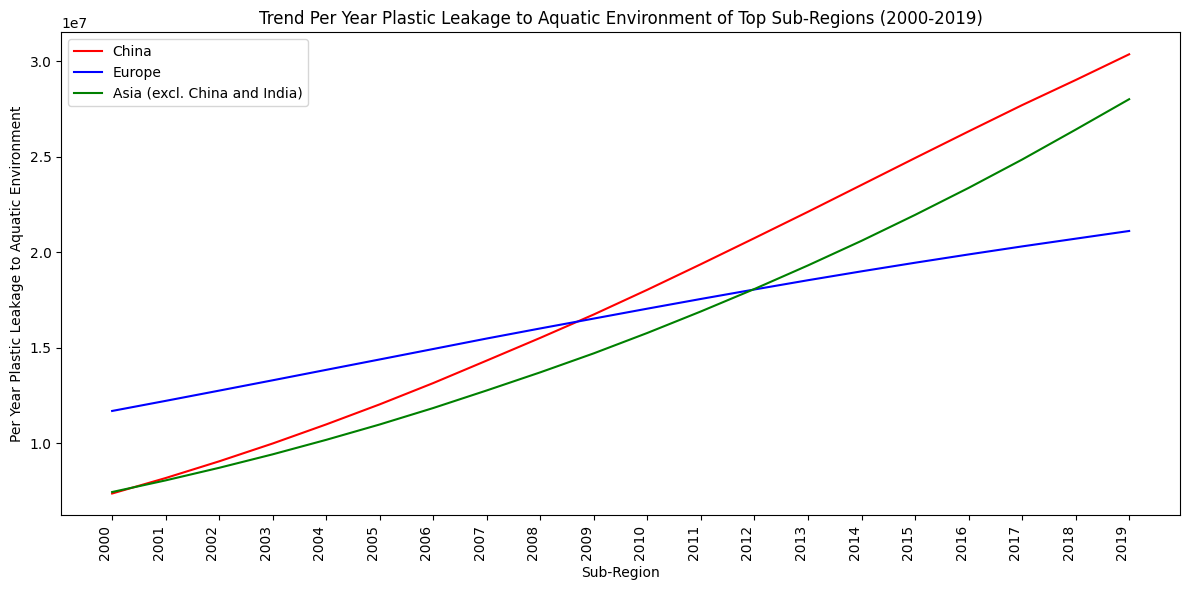

In [479]:
# take top 3 sub-region data only
df_china = df_region_only[df_region_only["Entity"] == "China"]
df_europe = df_region_only[df_region_only["Entity"] == "Europe"]
df_asia = df_region_only[df_region_only["Entity"] == "Asia (excl. China and India)"]

# visualize the average trend of metrics from all sub-regions over the period 2000-2019
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_china, x="Year", y="Per year plastic leakage to aquatic environment", color="red", label="China")
sns.lineplot(data=df_europe, x="Year", y="Per year plastic leakage to aquatic environment", color="blue", label="Europe")
sns.lineplot(data=df_asia, x="Year", y="Per year plastic leakage to aquatic environment", color="green", label="Asia (excl. China and India)")

# set labels and titles
plt.title("Trend Per Year Plastic Leakage to Aquatic Environment of Top Sub-Regions (2000-2019)")
plt.xlabel("Sub-Region")
plt.ylabel("Per Year Plastic Leakage to Aquatic Environment")

# adjust layout 
plt.xticks(df_china["Year"], rotation=90, ha="right")  
plt.tight_layout()
plt.legend()
plt.show()

We can see that Europe has a less steep slope compared to China and Asia. Though China and Asia both have lesser plastic leakage than Europe in initial years, we can see that both currently have higher plastic leakage compared to Europe. The steep slope is very disturbing seeing just how much plastic leakage increased in both sub-regions in a span of ~20 years only. Besides that, the positive slope of all 3 sub-regions indicate that the plastic leakage to aquating environment is an increasing trend, which means our aquatic environment is getting polluted at an alarming rate.

In [480]:
# now look at average plastic waste recycled
ave_recycled = df_mean[["Entity", "Share of waste recycled from total regional waste"]].sort_values("Share of waste recycled from total regional waste", ascending=False)
ave_recycled

,Entity,Share of waste recycled from total regional waste
4,India,9.287
2,China,8.846
3,Europe,8.492
0,Americas (excl. USA),7.136
1,Asia (excl. China and India),6.129
6,Oceania,5.323
7,Sub-Saharan Africa,4.381
5,Middle East & North Africa,4.151
8,United States,3.405


We can see that India and China are the 2 top sub-regions with highest average share of waste recycled. Though they have the highest average share of waste recycled, does that reflect the rest of their plastic management behaviors? Let's look at a visualization to see this.

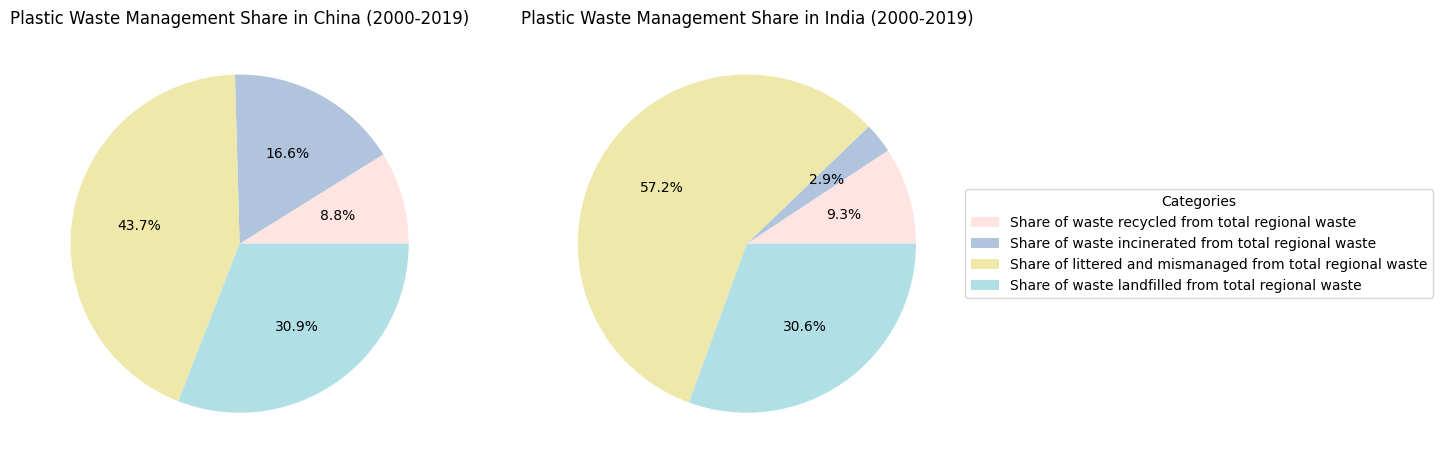

In [481]:
# dataframe for china and india mean data only
df_china_india = df_mean[df_mean["Entity"].isin(["China", "India"])]

# visualize the average plastic waste management shares of China and India over the period 2000-2019
# extract values for the pie charts
values_china = df_china_india.iloc[0, 1:5].values
values_india = df_china_india.iloc[1, 1:5].values
labels = df_china_india.columns[1:5].values
colors = ["mistyrose", "lightsteelblue", "palegoldenrod", "powderblue"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the first pie chart for China
metrics1 = ax1.pie(values_china, autopct="%1.1f%%", colors=colors)
ax1.set_title("Plastic Waste Management Share in China (2000-2019)")

# plot the second pie chart for India
metrics2 = ax2.pie(values_india, autopct="%1.1f%%", colors=colors)
ax2.set_title("Plastic Waste Management Share in India (2000-2019)")

# add a legend
ax2.legend(metrics1[0], labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

From the pie chart result, it's clear that having highest average share of recycled waste doesn't mean a great plastic managing behavior. Both sub-regions have a very high share of mismanaged waste and landfilled waste. This isn't a very hopeful trend as well seeing that the highest recycling shares are only 9.3% whereas the rest of shares are still high on plastic mismanagement.

In [482]:
# now look at average plastic waste incinerated
ave_incinerated = df_mean[["Entity", "Share of waste incinerated from total regional waste"]].sort_values("Share of waste incinerated from total regional waste", ascending=False)
ave_incinerated

,Entity,Share of waste incinerated from total regional waste
3,Europe,26.544
8,United States,17.234
2,China,16.595
1,Asia (excl. China and India),14.898
6,Oceania,10.485
4,India,2.903
0,Americas (excl. USA),1.129
5,Middle East & North Africa,0.434
7,Sub-Saharan Africa,0.025


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


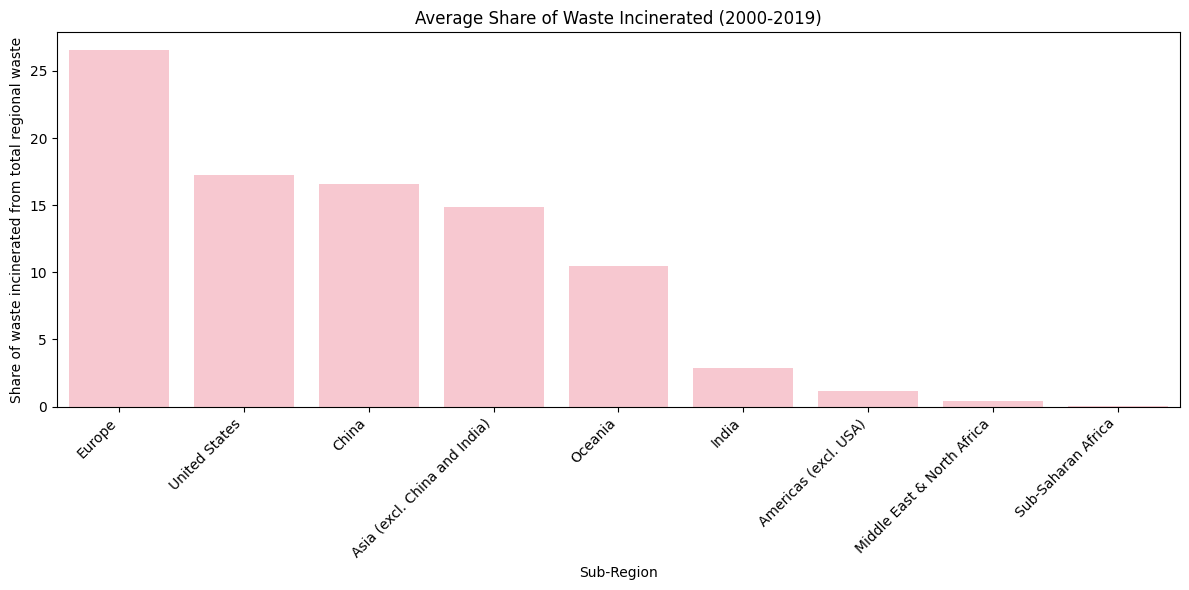

In [483]:
# visualize the average waste incinerated from all sub-regions over the period 2000-2019
category = "Share of waste incinerated from total regional waste"
plt.figure(figsize=(12, 6))
sns.barplot(data=ave_incinerated, x="Entity", y=category, color="pink")

# set labels and titles
plt.title("Average Share of Waste Incinerated (2000-2019)")
plt.xlabel("Sub-Region")
plt.ylabel("Share of waste incinerated from total regional waste")

# adjust layout 
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

It seems Europe has the highest incinerating tendencies, followed by United States and China. Waste incinerations seem like one way out of plastic waste accumulation, but it provides various dangers to air pollution and toxic side product. It's interesting to see that Europe and United States as sub-regions who typically advocate for "green" or "climate" are still engaging in waste incineration.

In [484]:
# now look at average plastic waste mismanaged
ave_mismanaged = df_mean[["Entity", "Share of littered and mismanaged from total regional waste"]].sort_values("Share of littered and mismanaged from total regional waste", ascending=False)
ave_mismanaged

,Entity,Share of littered and mismanaged from total regional waste
7,Sub-Saharan Africa,66.585
4,India,57.242
2,China,43.658
5,Middle East & North Africa,42.962
1,Asia (excl. China and India),35.776
0,Americas (excl. USA),31.476
3,Europe,9.292
6,Oceania,9.289
8,United States,5.792


The top sub-regions are Sub-Saharan Africa, India, and China. It seems that India and China have been showing up a lot throughout our analysis here. Let's look at comparison of mismanagement trends over the year from the 2 top sub-regions.

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

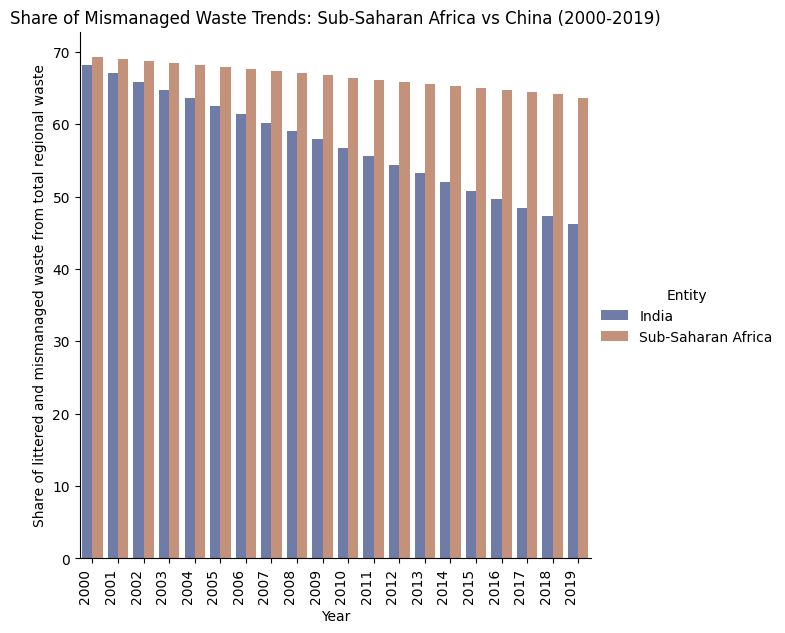

In [485]:
# dataframe for china and india mean data only
df_subsaharanafrica_india = df_region_only[df_region_only["Entity"].isin(["Sub-Saharan Africa", "India"])]

# visualize the average plastic waste management shares of China and India over the period 2000-2019
# Draw a nested barplot
category = "Share of littered and mismanaged from total regional waste"
sns.catplot(data=df_subsaharanafrica_india, kind="bar", x="Year", y=category, hue="Entity", errorbar="sd", palette="dark", alpha=0.6, height=6)

# set labels and titles
plt.title("Share of Mismanaged Waste Trends: Sub-Saharan Africa vs China (2000-2019)")
plt.xlabel("Year")
plt.ylabel("Share of littered and mismanaged waste from total regional waste")

# adjust layout 
plt.xticks(rotation=90, ha="right")
plt.show()

It seems both sub-regions show a decreasing trend of littered and mismanaged waste shares, which gives a little more hopeful outlook. India has a steeper decrease and there seems to be a lot of improvement over the years. Let's hope this trend continues and can ripple accross many other harmful plastic waste management as well.

In [486]:
# now look at average plastic waste landfilled
ave_landfilled = df_mean[["Entity", "Share of waste landfilled from total regional waste"]].sort_values("Share of waste landfilled from total regional waste", ascending=False)
ave_landfilled

,Entity,Share of waste landfilled from total regional waste
6,Oceania,74.902
8,United States,73.569
0,Americas (excl. USA),60.259
3,Europe,55.672
5,Middle East & North Africa,52.454
1,Asia (excl. China and India),43.197
2,China,30.901
4,India,30.568
7,Sub-Saharan Africa,29.009


Similar to incarceration of waste, landfilled waste also pose a lot of environmental hazards and dangers. It's surprising to me that Oceania holds the first position. Let's look at a visualization to see this information clearer.

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

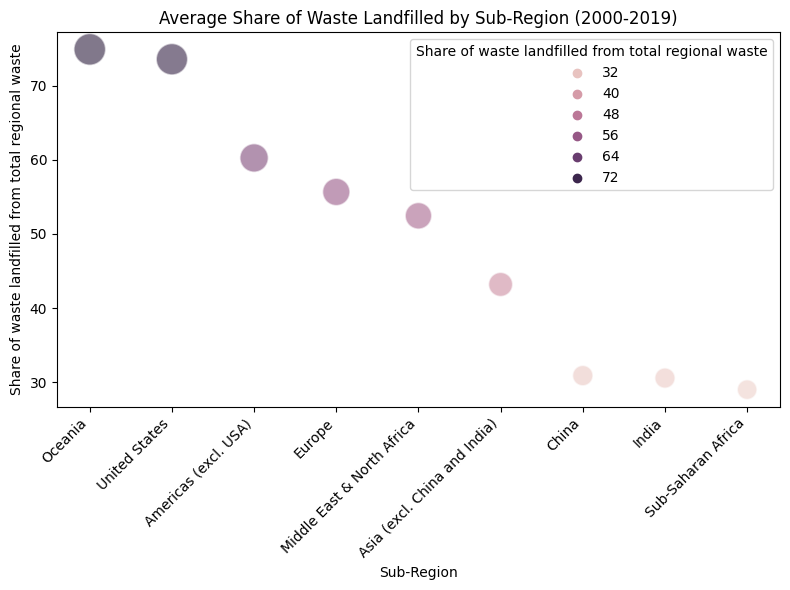

In [487]:
# visualize average share of waste landfilled from total regional waste
# create a scatter plot with size corresponding to the value
category = "Share of waste landfilled from total regional waste"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ave_landfilled, x="Entity", y=category, s=ave_landfilled[category] * 7, hue=category, alpha=0.6)

# set labels and title
plt.title("Average Share of Waste Landfilled by Sub-Region (2000-2019)")
plt.xlabel("Sub-Region")
plt.ylabel("Share of waste landfilled from total regional waste")

# adjust layout 
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Oceania and United States have bigger bubbles with darker hue, and they are closer in size and color which indicates both have similar average shares of landfilled waste. Again this trend is quite alarming knowing that these shares hit 70% which means a lot of plastic waste have been landfilled. The lowest share is still 32% which indicates that even the lowest share is still above 30%. The practice of landfilling plastic waste is still very much common accross different sub-regions. 

#### Overall, we can conclude that trends accross different metrics are still alarming.
- Plastic leakage to aquatic environment trends look very unpromising with some showing high increases in just 20 years.
- Share of recycled waste top sub-regions still have under 10% shares, indicating how recycling isn't as practiced as it is preached.
- Average share of incinerated waste also show some moderate shares.
- Average share of landfilled waste are really high and seem to have a common practice trend accross sub-regions.

#### One slightly hopeful outlook is how there's a quite rapid decreasing rate of mismanaged waste shares from the 2 top sub-regions. Let's hope there's a ripple effect and a higher increase of focus in recycling waste instead of any other. 

### IV. How does GDP relate to plastic waste management?

In [488]:
# merge the plastic management global country data 
df_global_plastic_management = pd.merge(plastic_emitted_ocean, 
                               global_mismanaged_share[["Entity", "Year", "Share of global mismanaged plastic waste"]], 
                               on=["Entity", "Year"], how="left").merge(
                               global_emitted_share[["Entity", "Year", "Share of global plastics emitted to ocean"]], 
                               on=["Entity", "Year"], how="left")
df_global_plastic_management

,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1),Share of global mismanaged plastic waste,Share of global plastics emitted to ocean
0,Africa,NaN,2019,78252,22.162,7.989
1,Albania,ALB,2019,1565,0.113,0.160
2,Algeria,DZA,2019,5774,1.238,0.590
3,Angola,AGO,2019,860,0.384,0.088
4,Antigua and Barbuda,ATG,2019,2,0.001,0.000
...,...,...,...,...,...,...
166,Vietnam,VNM,2019,28221,1.801,2.881
167,Western Sahara,ESH,2019,38,0.007,0.004
168,World,OWID_WRL,2019,979458,NaN,NaN
169,Yemen,YEM,2019,252,0.472,0.026


In [516]:
# rename the country code column to code to match up and also remove codes from column names of GDP data
global_gdp.rename(columns={"Country Code": "Code", "Population, total [SP.POP.TOTL]": "Total Population",
                           "Surface area (sq. km) [AG.SRF.TOTL.K2]": "Surface Area (sq. km)",
                            "CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]": "CO2 emission (metric tons per capita)",	
                            "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP (current US$)",
                            "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]": "GDP growth (annual%)",	
                            "GDP per capita (current US$) [NY.GDP.PCAP.CD]": "GDP per capita (current US$)",	
                            "Population density (people per sq. km of land area) [EN.POP.DNST]": "Population density (people per sq. km)"}, inplace=True)

# dropna for time and examine
global_gdp.dropna(subset=["Time"], inplace=True)
global_gdp.drop(columns=["Time Code"], inplace=True)
global_gdp


,Time,Country Name,Code,Total Population,Surface Area (sq. km),CO2 emission (metric tons per capita),GDP (current US$),GDP growth (annual%),GDP per capita (current US$),Population density (people per sq. km)
0,2019,Afghanistan,AFG,37769499.000,652860,0.297563650500103,18904502222.2108,3.911603419423,500.52298078433,57.9082516903546
1,2019,Albania,ALB,2854191.000,28750,1.74946245713759,15401826080.5183,2.08771199649604,5396.21422690995,104.167554744526
2,2019,Algeria,DZA,42705368.000,2381741,3.99440182789199,171760290068.157,0.999999999741789,4021.98360796603,17.9303156808402
3,2019,American Samoa,ASM,47321.000,200,..,647000000,-0.487804878048777,13672.576657298,236.605
4,2019,Andorra,AND,76343.000,470,6.2872038038851,3155149347.92151,2.01554763848308,41328.6004993451,162.431914893617
...,...,...,...,...,...,...,...,...,...,...
212,2019,Virgin Islands (U.S.),VIR,106669.000,350,..,4117000000,2.77777777777777,38596.0307118282,304.768571428571
213,2019,West Bank and Gaza,PSE,4685306.000,6020,..,17133500000,1.36268746558062,3656.85827137011,778.290033222591
214,2019,"Yemen, Rep.",YEM,31546691.000,527970,0.354864476911382,..,..,693.816483547342,59.7509157717295
215,2019,Zambia,ZMB,18380477.000,752610,0.414336363523101,23308667781.2258,1.44130602603785,1268.12094056241,24.7252142213374


In [570]:
# merge plastic management data per country with gdp data per country on country codes that match up
gdp_plastic_management = pd.merge(global_gdp, df_global_plastic_management[["Code", 
                                                                               "Mismanaged waste emitted to the ocean (metric tons year-1)",
                                                                                "Share of global mismanaged plastic waste", 
                                                                                "Share of global plastics emitted to ocean"]], 
                                    on=["Code"], how="inner")
gdp_plastic_management

,Time,Country Name,Code,Total Population,Surface Area (sq. km),CO2 emission (metric tons per capita),GDP (current US$),GDP growth (annual%),GDP per capita (current US$),Population density (people per sq. km),Mismanaged waste emitted to the ocean (metric tons year-1),Share of global mismanaged plastic waste,Share of global plastics emitted to ocean
0,2019,Albania,ALB,2854191.000,28750,1.74946245713759,15401826080.5183,2.08771199649604,5396.21422690995,104.167554744526,1565,0.113,0.160
1,2019,Algeria,DZA,42705368.000,2381741,3.99440182789199,171760290068.157,0.999999999741789,4021.98360796603,17.9303156808402,5774,1.238,0.590
2,2019,Angola,AGO,32353588.000,1246700,0.753638205444169,69309110145.7687,-0.702272957616017,2142.23875712854,25.9513820486083,860,0.384,0.088
3,2019,Antigua and Barbuda,ATG,92117.000,440,5.52558159731646,1675403703.7037,4.34405983052592,18187.7797117112,209.356818181818,2,0.001,0.000
4,2019,Argentina,ARG,44938712.000,2780400,3.74202981162433,447754686715.081,-2.00086100285785,9963.67423069626,16.4208266190179,4137,0.754,0.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2019,"Venezuela, RB",VEN,28971683.000,912050,3.71059907013341,..,..,..,32.8458511422255,5988,1.087,0.611
149,2019,Viet Nam,VNM,95776716.000,331310,3.56784836932601,334365257920.289,7.3592809998546,3491.09127859728,305.577071681306,28221,1.801,2.881
150,2019,West Bank and Gaza,PSE,4685306.000,6020,..,17133500000,1.36268746558062,3656.85827137011,778.290033222591,118,0.003,0.012
151,2019,"Yemen, Rep.",YEM,31546691.000,527970,0.354864476911382,..,..,693.816483547342,59.7509157717295,252,0.472,0.026


In [571]:
# select relevant columns for correlation analysis
columns = ["CO2 emission (metric tons per capita)", 
           "GDP (current US$)", 
           "GDP per capita (current US$)", 
           "Population density (people per sq. km)", 
           "Mismanaged waste emitted to the ocean (metric tons year-1)",
           "Share of global mismanaged plastic waste",
           "Share of global plastics emitted to ocean"]
gdp_plastic_management[columns] = gdp_plastic_management[columns].apply(pd.to_numeric, errors='coerce')

# find correlation
correlation_matrix = gdp_plastic_management[columns].corr()
correlation_matrix

,CO2 emission (metric tons per capita),GDP (current US$),GDP per capita (current US$),Population density (people per sq. km),Mismanaged waste emitted to the ocean (metric tons year-1),Share of global mismanaged plastic waste,Share of global plastics emitted to ocean
CO2 emission (metric tons per capita),1.000,0.233,0.616,0.112,-0.070,-0.060,-0.070
GDP (current US$),0.233,1.000,0.203,-0.027,0.119,0.404,0.119
GDP per capita (current US$),0.616,0.203,1.000,0.655,-0.096,-0.124,-0.096
Population density (people per sq. km),0.112,-0.027,0.655,1.000,-0.011,-0.026,-0.011
Mismanaged waste emitted to the ocean (metric tons year-1),-0.070,0.119,-0.096,-0.011,1.000,0.543,1.000
Share of global mismanaged plastic waste,-0.060,0.404,-0.124,-0.026,0.543,1.000,0.543
Share of global plastics emitted to ocean,-0.070,0.119,-0.096,-0.011,1.000,0.543,1.000


<Figure size 400x200 with 0 Axes>

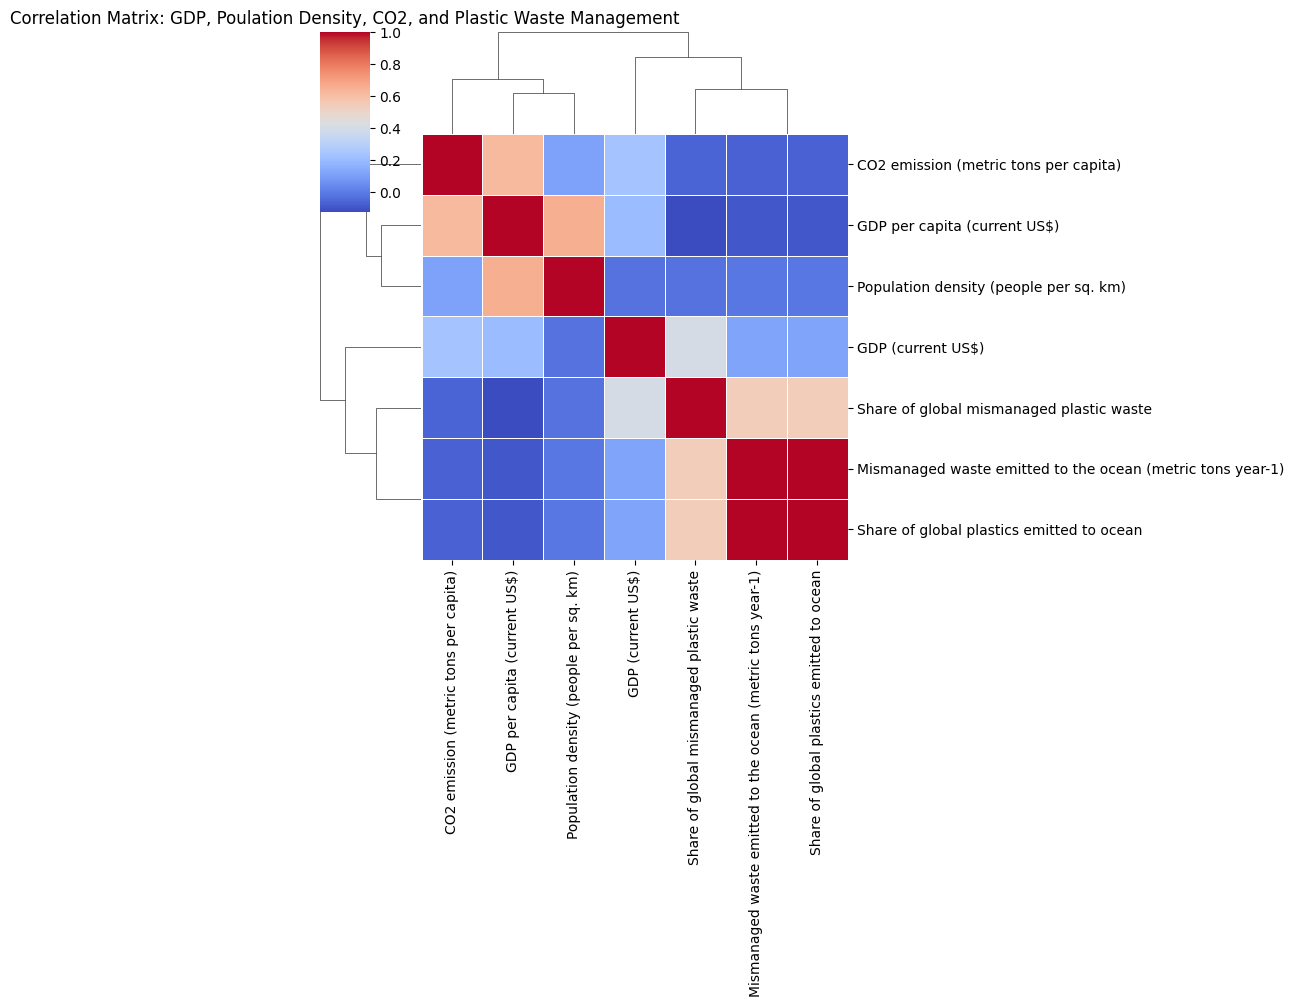

In [554]:
# visualize the correlation matrix using a clustermap
plt.figure(figsize=(4, 2))
sns.clustermap(correlation_matrix, cmap="coolwarm", fmt="0.3f", linewidths=0.5)

# set title
plt.title("Correlation Matrix: GDP, Poulation Density, CO2, and Plastic Waste Management")
plt.show()

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


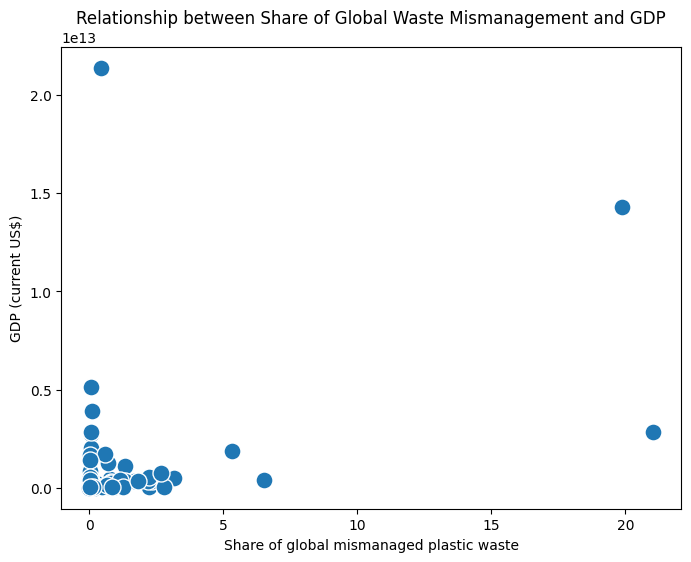

In [569]:
# visualize relatlionship between share of global waste mismanagement and GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Share of global mismanaged plastic waste",
                y="GDP (current US$)", data=gdp_plastic_management, s=150)

# set labels and title
plt.title("Relationship between Share of Global Waste Mismanagement and GDP")
plt.xlabel("Share of global mismanaged plastic waste")
plt.ylabel("GDP (current US$)")

# Show the plot
plt.show()

## Part 3: Documenting your project (notebook, data narrative, and GitHub repository)

### Link: